### Popisná statistika

V této přednášce se budeme věnovat popisné statistice. Když se řekne statistika, můžeme si představit dva základní pojmy:


1) Statistiku popisnou 

2) Statistiku inferenční


Statistika popisná nám popisuje nějaký soubor čísel. Například, kolik pozorujeme na určitém cvičení Úvodu do statistiky žen a mužů. Statistika inferenční nám pak pomáhá na základě naměřených dat dělat úsudky o celé populaci studentů statistiky, tedy včetně cvičení, které jsme přímo neměřili.

Úkolem popisné statistiky je shrnout informace o našem výběru do pár čísel, které nám pomohou pochopit jaké má náš výběr vlastnosti. Hlavními vlastnostmi, které nás zajímají je:

1) Jakáje typická hodnota měřené proměnné

2) Na kolik se liší hodnoty jendotlivých pozorování (jak jsou rozptýlené)


Výběr popisné statistiky záleží na typu proměnné, kterou měříme. Z předchozí přednášky víme, že existují 3 typy proměnných:
1) Nominální
2) Ordinální
3) Kardinální

Dále víme, že nominální proměnné nemůžeme seřadit, ordinální můžeme seřadit a kardinální můžeme seřadit a zároveň říci o kolik je nějaká hodnota větší než jiná. 

#### Nominální proměnná

Příkladem nominální promněnné je například barva. Vezměme si například situaci, v kterém bychom zjišťovali informace o barvě auta na nějakém konkrétním parkovišti. Na parkovišti parkuje 100 aut. Všechna auta bychom obešli a barvu zaznamenali. Jaký je nejlepší způsob, jak se něco dozvědět o všech 100 autech? Mohli bychom si všechny barvy přečíst a snažit se je zapomatovat tak. To by ale bylo obtížné. A právě proto na to nám slouží popisná statistika. Pomocí jednoho čísla můžeme vystihnout nejpočetnější barvu. Takové popisné statistice říkáme **mód**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

# nasimulujeme si 
barvy = ["červená", "bílá", "modrá", "zelená", "žlutá", "stříbrná", "hnědá", "černá"]
vzorek_aut = np.random.choice(barvy, size = 100, replace=True)

print(f"Prvních 5 aut z našeho seznamu: {vzorek_aut[:5]}")

Prvních 5 aut z našeho seznamu: ['hnědá' 'zelená' 'žlutá' 'hnědá' 'modrá']


In [3]:
def mod(x: str) -> str:
    """
    Vypočítá mód proměnné.
    """
    lab, count = np.unique(x, return_counts=True)
    return lab[count.argmax()]

In [4]:
print(f"Nejpočetnější barvou auta na parkovišti je: {mod(vzorek_aut)}")

Nejpočetnější barvou auta na parkovišti je: zelená


#### Ordinální proměnná

U ordinální proměnné, stejně jako u nominální, nemůžeme vypočítat o kolik je nějaká hodnota větší než druhá. Můžeme ale hodnoty seřadit. Toho se využívá k vypočítání popisné statistiky zvané **medián**. Medián nám značí prostžední hodnotu nějaké proměnné. Můžete si pro představit tak, že hodnoty proměnné seřadíte od nejmenší po největší a vyberete hodnotu, která bude přesně uprostřed. No a tato hodnota je medián. Matematicky se medián u proměnné $x$ vypočítá jako $median(x) = x_{(n + 1)/2}$. Pokud má naše proměnná sudý počet čísel, vypočítá se medián zpravidla jako průměr dvou prostředních hodnot, tedy $median(x) = \frac{x_{n/2} + x_{n/2+1}}{2}$. Ukážeme si její výpočet na příkladu vzdělání. V našich datech máme 3 stupně vzdělání - zš, sš a vš. Nasimulume příklad, v kterém budeme mít 9 dat.

In [10]:
vzdelani = ["zš", "sš", "vš"]
vzorek = np.random.choice(vzdelani, size=9, replace=True)
print(vzorek)

['vš' 'zš' 'sš' 'zš' 'zš' 'sš' 'vš' 'zš' 'sš']


In [11]:
#udelame z nej ordinalni promennou
vzorek_ordinal = pd.Categorical(vzorek, ordered=True, categories=vzdelani)
print(vzorek_ordinal)

['vš', 'zš', 'sš', 'zš', 'zš', 'sš', 'vš', 'zš', 'sš']
Categories (3, object): ['zš' < 'sš' < 'vš']


In [12]:
#nyni si promennou seradime
print(vzorek_ordinal.sort_values())

['zš', 'zš', 'zš', 'zš', 'sš', 'sš', 'sš', 'vš', 'vš']
Categories (3, object): ['zš' < 'sš' < 'vš']


In [18]:
# nalezneme si prostredek a vyfiltrujeme
prostredek = int((vzorek_ordinal.shape[0] +1) / 2)
print(f"Medián našeho vzorku je: {vzorek_ordinal.sort_values()[prostredek]}")

Medián našeho vzorku je: sš


Samozřejmě můžeme u ordinálních proměnných počítat také mód.

In [123]:
print(f"Nejčastější hodnotou vzdělání v našem vzorku je: {mod(vzorek)}")

Nejčastější hodnotou vzdělání v našem vzorku je: sš


Jak si asi pamatujete z předchozího semestru, u různých proměnných jsme počítali relativní četnosti (četnost je počet pozorování učité hodnoty. Relativní četnost potom počet pozorování děleno počet případů celkem). Například jsme počítali relativní četnost výsledků hodů mincí. Výsledky hodu mincí jsou také nominální proměnnou. Další statistikou, kterou můžete u nominálních a ordinálních proměnných spočítat jsou tedy četnosti. Ty nám řeknou více o rozložení hodnot v proměnné. Pojďme si takový příklad ukázat na našem vzorku se vzděláním.

In [124]:
vzdelani_vzorek = np.random.choice(vzdelani, size=1000, replace=True)
t = pd.value_counts(vzdelani_vzorek) / vzdelani_vzorek.shape[0]
print(t)

zš    0.359
sš    0.322
vš    0.319
dtype: float64


Nejčastějším způsobem zobrazení četností je sloupcový graf (bar plot). 

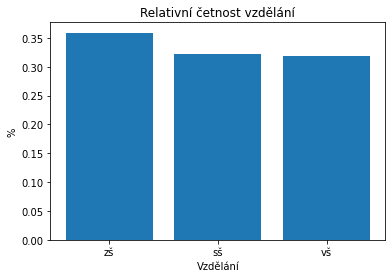

In [125]:
plt.bar(t.index, t.values)
plt.title("Relativní četnost vzdělání")
plt.ylabel("%")
plt.xlabel("Vzdělání")
plt.show()

#### Kardinální proměnná

Kardinální proměnná nám umožňují seřadit hodnoty a říci o kolik jsou větší. Kardinální proměnné jsou tedy číselné. Rozlišujeme mezi **diskrétní** a **spojitou**. Diskrétní nabývá celých čísel (1,2,3,4 etc., například počet dětí), tedy $\in Z$. Spojitá proměnná pak teoreticky nebývá nekonečně mnoho hodnot, prakticky je ale omezena tím, jak přesně dokážeme danou metriku měřit. Platí ale, že spojité proměnné nabývají racionálních čísel, tedy $\in R$. Stejně jako u ordinální proměnné, můžeme vypočítat mod a medián. Další popisnou statistikou, která nám prozradí něco o velikosti hodnot vnašich datech je **průměr**. Průměr proměnné $x$ vypočítáme jako $\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$. Pojďme si ukázat, jak průměr vypočítat na datech o počtu dětí.

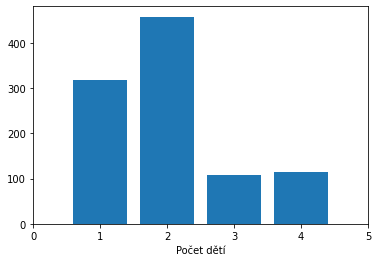

In [25]:
rodiny = [1,2,3,1,1,2,2,4,2]
pocet_deti = np.random.choice(rodiny, size=1000, replace=True)
t = pd.value_counts(pocet_deti)
plt.bar(t.index, t)
plt.xlabel("Počet dětí")
plt.xticks([0,1,2,3,4,5])
plt.show()

In [24]:
prumer = pocet_deti.sum() / pocet_deti.shape[0]
print(f"Průměrný počet dětí: {prumer}")

Průměrný počet dětí: 1.976


Pojďme si ještě vypočítat mod a medián.

In [28]:
print(f"Nejčastější počet dětí: {mod(pocet_deti)}")
print(f"Mediánový počet dětí: {np.median(pocet_deti)}")

Nejčastější počet dětí: 2
Mediánový počet dětí: 2.0


Jak jsme uvedli na začátku, úkolem popisné statistiky není pouze přiblížit, jak vypadá typická hodnota naší proměnné, ale také přiblížit, jak jsou od sebe odlišné. K tomu nám slouží metrika, kterou nazýváme rozptyl. Rozptyl vypočítáme tak, že každou hodnotu odečteme od průměru a umocníme. Tyto hodnoty sečteme a vydělíme počtem pozorování. Matematicky bychom rozptyl $\sigma^2$ proměnné $x$ vypočítali jako $\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \overline{x})$. Ve statistice se také používá pro výpočet rozptýlenosti směrodatná odchylka $\sigma$, které se vypočítá jako $\sigma = \sqrt{\sigma^2}$  Pojďme vypočítat rozptyl a směrodatnou odchylku u naší proměnné počet dětí.

In [30]:
rozptyl = np.sum((pocet_deti - prumer)**2) / pocet_deti.shape[0]
smerodatna_odchylka = np.sqrt(rozptyl)

print(f"Rozptyl počtu dětí: {np.round(rozptyl, 2)}")
print(f"Směrodatná odchylka: {np.round(smerodatna_odchylka, 2)}")

Rozptyl počtu dětí: 0.89
Směrodatná odchylka: 0.94


Abychom si lepe ukázali, jak směrodatná odchylka a průměr ovlivňují rozložení naší proměnné, tak si nasimulujeme různé situace.      